## Projeto - Fuzzy

#### Nome: Antônio Victor Mendes Fonseca     Turma: C210-L3    Matrícula:109
#### Nome: Fábio Luiz Fiorita Pontes                 Turma: C210-L3    Matrícula:1553


In [2]:
!pip install scikit-fuzzy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 4.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 5.1 MB/s eta 0:00:0000:0100:01
  Using cached scipy-1.8.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (42.2 MB)
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894091 sha256=b6e91279c4901960bc78b05f6ca259ca6916dfe2a6d2f7e5182cfa1ccfdb5e39
  Stored in directory: /home/fabiofiorita/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzzy
import skfuzzy.control as control

#### Criando antescedente (entrada/input)

/home/fabiofiorita/.local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


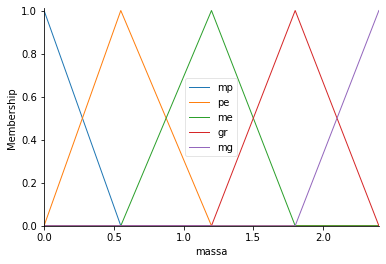

In [4]:
# Definindo universo de discurso e nome da variável
universo_massa = np.arange(0, 2.41, 0.01)

massa = control.Antecedent(universe = universo_massa, label = "massa")

# Criando função de pertinência triangular -> trimf, trapezoidal -> trapmf
massa["mp"] = fuzzy.trimf(massa.universe, [0, 0, 0.55])
massa["pe"] = fuzzy.trimf(massa.universe, [0, 0.55, 1.20])
massa["me"] = fuzzy.trimf(massa.universe, [0.55, 1.20, 1.80])
massa["gr"] = fuzzy.trimf(massa.universe, [1.20, 1.80, 2.40])
massa["mg"] = fuzzy.trimf(massa.universe, [1.80, 2.40, 2.40])

massa.view()

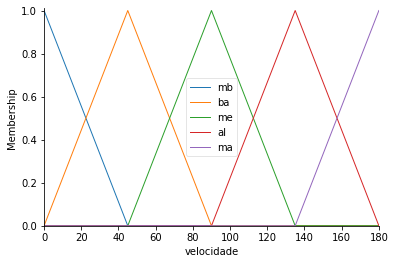

In [5]:
# Definindo universo de discurso e nome da variável
universo_velocidade = np.arange(0, 181)

velo = control.Antecedent(universe = universo_velocidade, label = "velocidade")

velo["mb"] = fuzzy.trimf(velo.universe, [0, 0, 45])
velo["ba"] = fuzzy.trimf(velo.universe, [0, 45, 90])
velo["me"] = fuzzy.trimf(velo.universe, [45, 90, 135])
velo["al"] = fuzzy.trimf(velo.universe, [90, 135, 180])
velo["ma"] = fuzzy.trimf(velo.universe, [135, 180, 180])

velo.view()


#### Criando consequent (saída/output)

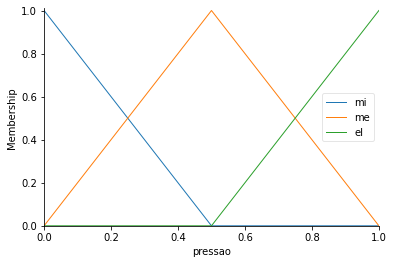

In [6]:
# Universo da pressao
universo_pressao = np.arange(0, 1.001, 0.001)

pressao = control.Consequent(universe = universo_pressao, label = "pressao")

pressao["mi"] = fuzzy.trimf(pressao.universe, [0, 0, 0.5])
pressao["me"] = fuzzy.trimf(pressao.universe, [0, 0.5, 1.0])
pressao["el"] = fuzzy.trimf(pressao.universe, [0.5, 1.0, 1.0])

pressao.view()


#### Criando regras

In [7]:
# REGRA -> expressão X, resultado Y

regra1 = control.Rule((velo["mb"] & massa["mp"]) |
                      (velo["mb"] & massa["pe"]) |
                      (velo["mb"] & massa["me"]), pressao["mi"])

regra2 = control.Rule((velo["mb"] & massa["gr"]) |
                      (velo["mb"] & massa["mg"]), pressao["me"])

regra3 = control.Rule((velo["ba"] & massa["mp"]) |
                      (velo["ba"] & massa["pe"]) |
                      (velo["ba"] & massa["me"]), pressao["mi"])

regra4 = control.Rule((velo["ba"] & massa["gr"]) |
                      (velo["ba"] & massa["mg"]), pressao["me"])

regra5 = control.Rule((velo["me"] & massa["mp"]) |
                      (velo["me"] & massa["pe"]), pressao["mi"])

regra6 = control.Rule((velo["me"] & massa["me"]), pressao["me"])

regra7 = control.Rule((velo["me"] & massa["gr"]) |
                      (velo["me"] & massa["mg"]), pressao["el"])

regra8 = control.Rule((velo["al"] & massa["mp"]) |
                      (velo["al"] & massa["pe"]) |
                      (velo["al"] & massa["me"]), pressao["me"])

regra9 = control.Rule((velo["al"] & massa["gr"]) |
                      (velo["al"] & massa["mg"]), pressao["el"])

regra10 = control.Rule((velo["ma"] & massa["mp"]) |
                      (velo["ma"] & massa["pe"]) |
                      (velo["ma"] & massa["me"]), pressao["me"])

regra11 = control.Rule((velo["ma"] & massa["gr"]) |
                      (velo["ma"] & massa["mg"]), pressao["el"])

#### Criando sistema

In [8]:
# Adicionando regras ao controle
pressao_controle = control.ControlSystem([regra1, regra2, regra3, regra4, regra5,
                                         regra6, regra7, regra8, regra9, regra10,
                                         regra11])


# Criando sistema com o controle de pressao
sistema = control.ControlSystemSimulation(pressao_controle)

Resultado 'desfuzzificado': 0.5595238095238096


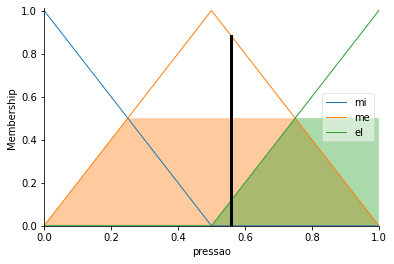

In [9]:
sistema.input["velocidade"] = 155
sistema.input["massa"] = 1.5

# Executando o sistema
sistema.compute()

print(f"Resultado 'desfuzzificado': {sistema.output['pressao']}")

pressao.view(sim = sistema)